# Supervised Learning

# Beta Bank Model Analysis

## Introduction

Beta Bank reports costumers to be leaving the bank in a steady manner, the bank has reported it is cheaper to retain existing costumers rather than attract new ones. The focus on this project will be to build a model which can predict whether a costumer will leave the bank soon.

Data provided to train model consists of clients past behaivior and termination of contracts with the bank. Available features in data include:

- RowNumber — data string index
- CustomerId — unique customer identifier
- Surname — surname
- CreditScore — credit score
- Geography — country of residence
- Gender — gender
- Age — age
- Tenure — period of maturation for a customer’s fixed deposit (years)
- Balance — account balance
- NumOfProducts — number of banking products used by the customer
- HasCrCard — customer has a credit card
- IsActiveMember — customer’s activeness
- EstimatedSalary — estimated salary

Our target variable in data being: 

- Exited — сustomer has left

### Import Libraries

In [21]:
# Import nessecary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import roc_curve, roc_auc_score

### Load Data

In [22]:
# Load data into variable
data = pd.read_csv('/datasets/Churn.csv')

### View Data

We display both the provided dataset and its information to get a general sense of its structure. As the introduction describes, our data possesses 14 feature columns with our target variable being the last. 

In [23]:
# Display both data and info
display(data)
data.info()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Our data shows a total of 10,000 rows with only the `Tenure` feature displaying missing values. Datatypes include both integer and object types present in the data. 

## Data Preprocessing

Data preprocessing will consist of cleaning the data for unecessary columns and filling missing values, and also enconding the data to properly train a predictive model. 

### Remove Column and Fill NaN Values

The data displays `RowNumber` and `CostumerId` features which pertains to costumer identifiers and data string index numbers, we will remove these as it serves no purpose for training a model. Next we will fill missing values in the `Tenure` column as this feature does serve as predictor for the model.  

In [24]:
# Remove RowNumber  and CostumerId column
data = data.drop('RowNumber', axis=1)
data = data.drop('CustomerId', axis=1)

# Fill Tenure column NaN values with 0
data['Tenure'] = data['Tenure'].fillna(value=0)

### Data Encoding

As the data shows, the target feature `Exited` classifies clients that have left the bank or not, so the task will deal in classification algorithms. The data clearly shows several object datatype features which are not compatible with sci-kit learn library models, so we will be enconding the data. For the purpose of this project the data will be encoded in two copies: one encoded with One-Hot-Encode and the other using Label enconding. Two seprately encoded copies will ensure models are trained with compatible data according to model algorithm.

In [25]:
# Enconde data using One-Hot Encode
data_ohe = pd.get_dummies(data, drop_first=True)

# View data shape
data_ohe.shape

(10000, 2943)

In [26]:
# Make copy of original data frame to preserve original
data_copy = data

# Define categorical feature list
categorical = ['Surname', 'Geography', 'Gender']

# Create class instance, transform columns and drop columns in data copy
encoder = OrdinalEncoder()
encoded_columns = encoder.fit_transform(data_copy[categorical])
encoded_copy = pd.DataFrame(encoded_columns, columns=categorical)
data_copy = data_copy.drop(categorical, axis=1)

# Concatenate encoded columns to orginal
data_ordinal = pd.concat([data_copy, encoded_copy], axis=1)

# View data shape
data_ordinal.shape

(10000, 12)

Both data sets appear to have the correct shape, according to thier enconding.

### Identify Features and Target 

Now we are to identify two sets of target and feature variables on our encoded datasets. As mentioned previously target feature in our data set will be set as the `Exited` column, which indicates a 0 if costumer continued services with the bank, or 1 if costumer has left the bank.

In [27]:
# Identify target and features for OHE dataset
features_ohe = data_ohe.drop('Exited', axis=1)
target_ohe = data['Exited']

# Identify target and features for Ordinal Encoded Dataset
features_ordinal = data_ordinal.drop('Exited', axis=1)
target_ordinal = data_ordinal['Exited']

### Split Data

The provided data does not contain a separate set to be used for testing, so for the purpose of this study we will be spliting the data into a **3:1:1** ratio. The remaning data sets after spliting should include 60% training data, 20% for validation and 20% for testing.

In [28]:
# Split One-Hot enconded data
features_main_ohe, features_test_ohe, target_main_ohe, target_test_ohe = train_test_split(features_ohe, target_ohe, test_size=0.2, random_state=12345)
features_train_ohe, features_valid_ohe, target_train_ohe, target_valid_ohe = train_test_split(features_main_ohe, target_main_ohe, test_size=0.25, random_state=12345)

# View shape of splits
print("Training features ohe shape:", features_train_ohe.shape)
print("Validation features ohe shape:", features_valid_ohe.shape)
print("Training target ohe shape:", target_train_ohe.shape)

Training features ohe shape: (6000, 2942)
Validation features ohe shape: (2000, 2942)
Training target ohe shape: (6000,)


In [29]:
# Split label encoded data
features_main_ordinal, features_test_ordinal, target_main_ordinal, target_test_ordinal = train_test_split(features_ordinal, target_ordinal, test_size=0.2, random_state=12345)
features_train_ordinal, features_valid_ordinal, target_train_ordinal, target_valid_ordinal = train_test_split(features_main_ordinal, target_main_ordinal, test_size=0.25, random_state=12345)

# View shape of splits
print("Training features ordinal shape:", features_train_ordinal.shape)
print("Validation features ordinal shape:", features_valid_ordinal.shape)
print("Training target ordinal shape:", target_train_ordinal.shape)

Training features ordinal shape: (6000, 11)
Validation features ordinal shape: (2000, 11)
Training target ordinal shape: (6000,)


All training, validation and test datasets appear to have the expected shapes.

### Feature Scaling

Reviewing our One-Hot Encoded data we can see several feature columns that possess large dispersal between thier values, such as `CreditScore`, `Tenure`, `Age` etc. We will scale numeric features to provide equal importance when training the model.

In [30]:
# Define feature list 
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

# Create instance and transform numeric features
scaler = StandardScaler()
scaler.fit(features_train_ohe[numeric])

features_train_ohe[numeric] = scaler.transform(features_train_ohe[numeric])
features_valid_ohe[numeric] = scaler.transform(features_valid_ohe[numeric])

features_train_ohe.shape

/tmp/ipykernel_32/3499127312.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train_ohe[numeric] = scaler.transform(features_train_ohe[numeric])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_32/3499127312.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

(6000, 2942)

### Examining Class Balance

In order to examine if target class values are balanced, we will perform several class frequency and probability observations as well as sanity checking our model.

First we will obtain the class frequency of our whole target data.

In [31]:
# Obtain target class frequency of target data
class_frequency_target = data['Exited'].value_counts(normalize=True)
print(class_frequency_target)

0    0.7963
1    0.2037
Name: Exited, dtype: float64


We can see our target data displays an imbalance leaning towards clients who have not left the bank. Next we will train a simple decision tree model to check its accuracy against a constant model composed of only negative class.

In [32]:
# Train model on validation set 
model_F1_check = DecisionTreeClassifier(random_state=12345)
model_F1_check.fit(features_train_ordinal, target_train_ordinal)

# Obtain obtain accuracy score of predictions
predicted_valid_F1 = model_F1_check.predict(features_valid_ordinal)
F1_score_model = f1_score(target_valid_ordinal, predicted_valid_F1)

# Create constant predictions and obtain accuracy score
predictions_constant = pd.Series(data=1, index=range(len(target_valid_ordinal)))
F1_score_constant = f1_score(target_valid_ordinal, predictions_constant)

print("F1 score model:", F1_score_model)
print("F1 score constant:", F1_score_constant)

F1 score model: 0.4740740740740741
F1 score constant: 0.32705980761187786


Altough F1 score for the decision tree model is higher than the constant model, the diference is not considerable, from this we can further infer our data to be imbalanced.

In [33]:
# Obtain confusion matrix
confusion_matrix = confusion_matrix(target_valid_ordinal, predicted_valid_F1)
confusion_matrix

array([[1382,  227],
       [ 199,  192]])

A confustion matrix on our validation set predictions demonstrates the model to be adept at predicting true negative answers, which does not offer the necessary insight into clients who are to leave the bank. This confirms our data requires class balancing. 

We will calculate an F1 score on a logistic regression model with our data in its current state for comparision of improvement after balancing. 

In [34]:
# Create logistic regression model 
modelLR = LogisticRegression(random_state=12345, solver='liblinear')
modelLR.fit(features_train_ohe, target_train_ohe)
    
# Obtain F1 score
predicted_valid = modelLR.predict(features_valid_ohe)
print("F1 score:", f1_score(target_valid_ohe, predicted_valid))

F1 score: 0.3104693140794224


As we can see even though F1 score is not zero, it still does not reach an aceptable value of predictions of postitive classes.

To achieve class balancing for better results, models will be trained setting **`class_weight` hyperparameter to `balanced`** and have **thresholds** ajusted for higher true positive prediction rates 

## Class Balancing

To balanced our data we will be upsampling our training set data.

### Upsampling Training Data

In [35]:
# Define function for upsampling
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

# Apply function to ordinal data
features_upsampled_ordinal, target_upsampled_ordinal = upsample(features_train_ordinal, target_train_ordinal, 10)

#Apply function to ohe data
features_upsampled_ohe, target_upsampled_ohe = upsample(features_train_ohe, target_train_ohe, 10)

Upsampling on training set data is ready to be used for predictions.

## Model Training and Validation

Model training will be focused on **logistic regression** and **random forest algorithims**, models will be tuned using several hyperparameters to obtain best results. Models are to be applied to validations sets. Principle metric for result validation for this project will be F1 score. 

In this stage trained models will be iterated upon tuning for distinct hyperparameters to find the highest prediciton accuracy score for validation sets. In order to replicate model `random_state` hyperparameter will be set to `12345` for all models.

### Random Forest

Random forest model tuning will explore max depth values and number of estimators. Class weight paramter will be set to 'balanced'. Final results are concerned with obtaining highest F1 score possible. 

In [47]:
# Train model
best_est = 0
best_depth = 0
best_F1score = 0
best_modelRF = None
for est in range(65, 80, 5):
    for depth in range(20, 25):
        modelRF = RandomForestClassifier(n_estimators=est, max_depth=depth, random_state=12345, class_weight='balanced')
        modelRF.fit(features_upsampled_ordinal, target_upsampled_ordinal)
        predicted = modelRF.predict(features_valid_ordinal)
        F1_score = f1_score(target_valid_ordinal, predicted)
        if F1_score > best_F1score:
            best_depth = depth
            best_est = est
            best_F1score = F1_score
            best_modelRF = modelRF

# Obtain positive probabilities for best model
probabilities_valid_ordinal = best_modelRF.predict_proba(features_valid_ordinal)[:, 1]

# Adjust threshold and obtain F1 score
best_thresholdRF = 0.5
best_F1score_RF = 0
for threshold in np.arange(0, 0.9, 0.02):
    predicted_valid_ordinal = probabilities_valid_ordinal > threshold
    F1_scoreRF = f1_score(target_valid_ordinal, predicted_valid_ordinal)
    if F1_scoreRF > best_F1score_RF:
        best_thresholdRF = threshold
        best_F1score_RF = F1_scoreRF

# Compute AUC-ROC score
auc_rocRF = roc_auc_score(target_valid_ordinal, probabilities_valid_ordinal)

print("Best number of estimators:", best_est)
print("Best max depth:", best_depth)
print("Best threshold:", best_thresholdRF)
print("AUC-ROC score:", auc_rocRF)
print("Best F1 score:", best_F1score_RF)

Best number of estimators: 75
Best max depth: 24
Best threshold: 0.5
AUC-ROC score: 0.8439126778876491
Best F1 score: 0.594059405940594


Our random forest model indicates highest F1 score of 0.592 with threshold ajustment of 0.5, best depth of 24 and best number of estimators at 75. AUC-ROC scores at 0.84, indicating a hight true positive prediction rate. This model appears to reach acceptable score. 

### Logistic Regression

Logistic regression model will make use of the `liblinear` sovler and `class_weight` set to balanced.

In [39]:
# Train model
modelLR = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
modelLR.fit(features_upsampled_ohe, target_upsampled_ohe)

# Obtain positive probabilities
probabilities_valid_ohe = modelLR.predict_proba(features_valid_ohe)
probabilities_one_valid_ohe = probabilities_valid_ohe[:, 1]

# Adjust threshold and calculate F1 score
best_F1scoreLR = 0
best_thresholdLR = 0.5
for thresholdLR in np.arange(0, 0.3, 0.02):
    predicted_valid_ohe = probabilities_one_valid_ohe > thresholdLR
    F1_scoreLR = f1_score(target_valid_ohe, predicted_valid_ohe)
    if F1_scoreLR > best_F1scoreLR:
        best_thresholdLR = thresholdLR
        best_F1scoreLR = F1_scoreLR
        
# Compute AUC-ROC score
auc_rocLR = roc_auc_score(target_valid_ohe, probabilities_one_valid_ohe)

# Print Results
print("Best threshold:",  best_thresholdLR)
print("AUC-ROC score:", auc_rocLR)
print("Model F1 score:", F1_scoreLR) 

Best threshold: 0.28
AUC-ROC score: 0.7065467741397097
Model F1 score: 0.40890688259109315


Logistic regression model tunes for best results with a threshold of 0.28, however F1 score shows a value of 0.40 which is well below acceptable rate. AUC-ROC score is also shown to be lower than the random forest model.

###  ROC curve comparison

We will now plot ROC curves to compare our models true positive rates and pick the most effective.

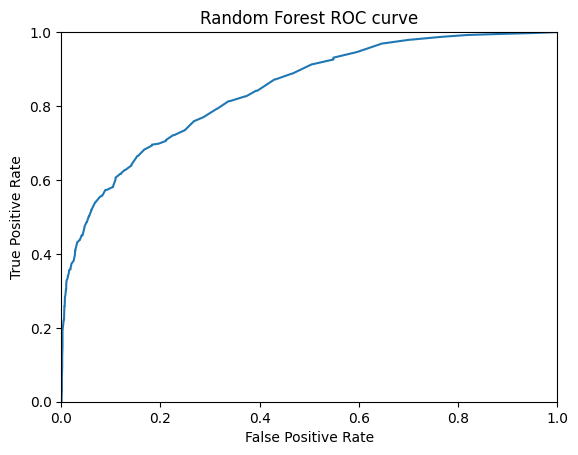

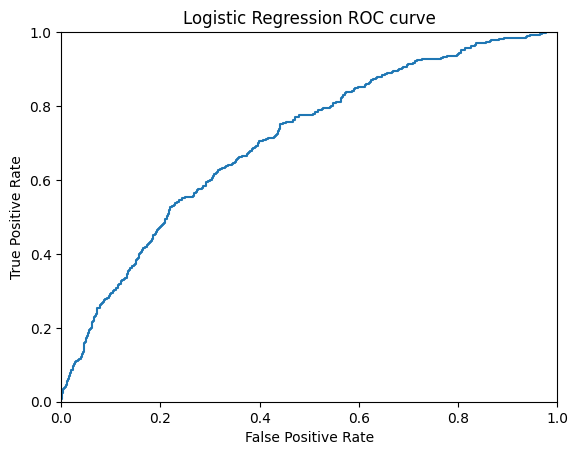

In [40]:
# Plot random forest ROC curve
fpr_RF, tpr_RF, thresholds_RF = roc_curve(target_valid_ordinal, probabilities_valid_ordinal)

plt.figure()
plt.plot(fpr_RF, tpr_RF)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC curve")
plt.show()

# Plot logistic regression ROC curve
fpr_LR, tpr_LR, thresholds_LR = roc_curve(target_valid_ohe, probabilities_one_valid_ohe)

plt.figure()
plt.plot(fpr_LR, tpr_LR)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC curve")
plt.show()

ROC curves for both models clearly show a higher curve achieved with the random forest model. 

## Model Testing

To test our random forest model we will use the obtained parameters while tuning for an F1 score of 0.59. 

### Final test

In [48]:
# Apply function to data
modelRF_test = RandomForestClassifier(n_estimators=75, max_depth=24, random_state=12345, class_weight='balanced')
modelRF_test.fit(features_upsampled_ordinal, target_upsampled_ordinal)


# Obtain F1 score
predicted_test = modelRF_test.predict(features_test_ordinal)
F1score_test = f1_score(target_test_ordinal, predicted_test)

print("Test F1 score:", F1score_test)

Test F1 score: 0.5920000000000001


F1 score of model for testing set shows value of **0.59**, while model may be improved upon we can say curent version of model reaches acceptable prediction rate of true positive answers using the aquired parameters. 

### AUC-ROC measure

We will now look at its ROC curve to compare with random answering model for sanity check and compute models **AUC-ROC** score. 

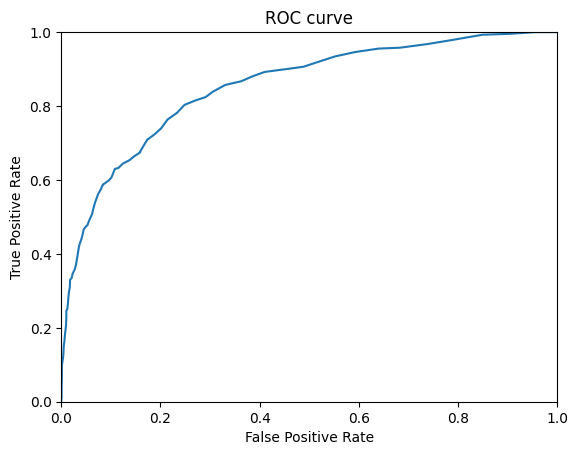

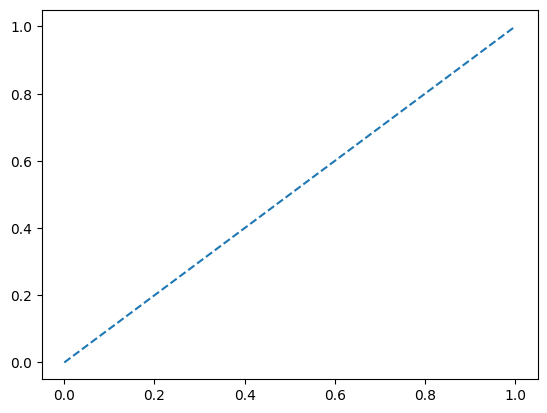

AUC-ROC score: 0.8518433876108987


In [49]:
# Obtain probabilities for test set
probabilities_test_ordinal = modelRF_test.predict_proba(features_test_ordinal)[:, 1]

# Plot ROC curve 
fpr, tpr, thresholds = roc_curve(target_test_ordinal, probabilities_test_ordinal)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()

# Plot random ROC curve
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Obtain AUC-ROC score
auc_roc = roc_auc_score(target_test_ordinal, probabilities_test_ordinal)

print("AUC-ROC score:", auc_roc)

ROC curve comparison shows tested model true positive rate of predictions well above a random prediction model. Quality of the model is further supported by an AUC-ROC score of **0.85** which shows better true positive predicton tan a 0.5 random model rate.

## Conclusions

Tested models show intitial data distribution was considerably skewed and required class balancing to reach acceptable prediction rates. In this case, setting `class_weight` parameter in models and threshold adjustment achieved the desired ouput.

Key observations include:

- Optimal threshold adujstment for random forest algorithm was 0.48.
- Test result for F1 score was 0.59, while validation set also resulted in 0.59. Further testing is recommended to find minimal and maximum F1 values model may produce. F1 score of 0.59 lends acceptable rate of precision - recall ratio however further ajustment might improve score.
- AUC-ROC score of 0.85 in relation to F1 score(0.59) relays an over all high quility model capable of reliable predicting true positive classifications.

Testing shows current random forest model reaches acceptable prediction rate for constumers that are to leave Beta Bank. 